In [1]:
from chesslab.agent_tf import agent
from chesslab.agent_stockfish import agent as s_agent
from chesslab.tests import kaufman_test
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf
class Model_1():

    def __init__(self,
                   n_classes=2):
        initializer = tf.keras.initializers.GlorotNormal()
        self.hw=[]
        self.hb=[]

        self.hw.append( tf.Variable(initializer(shape=(7,7,4,32),dtype=np.float32),name="hl1weigths",dtype="float32") )
        self.hb.append( tf.Variable(np.zeros(32,dtype=np.float32),name="hl1bias",dtype="float32") )
        #8x8x32
        self.hw.append( tf.Variable(initializer(shape=(5,5,32,64),dtype=np.float32),name="hl2weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(64,dtype=np.float32),name="hl2bias",dtype="float32"))
        #8x8x64
        self.hw.append( tf.Variable(initializer(shape=(3,3,64,128),dtype=np.float32),name="hl3weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(128,dtype=np.float32),name="hl3bias",dtype="float32"))
        #8x8x128
        self.hw.append( tf.Variable(initializer(shape=(8*8*128,256),dtype=np.float32),name="hl4weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(256,dtype=np.float32),name="hl4bias",dtype="float32"))

        self.hw.append( tf.Variable(initializer(shape=(256, n_classes),dtype=np.float32),name="outweigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(n_classes,dtype=np.float32),name="outbias",dtype="float32"))

        self.trainable_variables = []
        for i in range(len(self.hw)):
            self.trainable_variables.append(self.hw[i])    
            self.trainable_variables.append(self.hb[i])

    def __call__(self,x): 

        out = tf.cast(x, tf.float32)
        out = tf.reshape(out, shape=[-1, 8, 8, 4])

        layer=0
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.relu(out)
              #8*8*32
        layer+=1
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.relu(out)
              #8*8*64
        layer+=1  
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*128
        layer+=1
        out =  tf.reshape(out,[-1, 8*8*128])
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])
        out = tf.nn.relu(out)

        layer+=1
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])

        return out
model = Model_1()

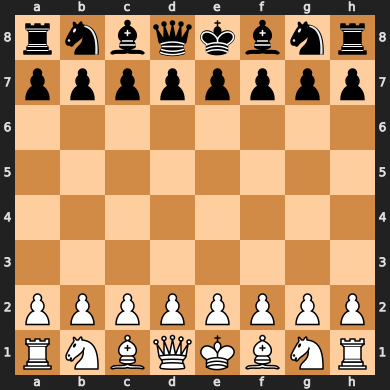

In [3]:
board=chess.Board()
board

In [4]:
base_name = './tmp/tf_weights-relu.0.{}.h5'
deepbot = agent(model,base_name.format(1))
move=deepbot.select_move(board)
move

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Move.from_uci('e2e4')

In [5]:
moves,values=deepbot.get_move_values(board)

In [6]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [7]:
values

array([2.5122739e-15, 8.3199176e-15, 2.1841227e-14, 5.1912400e-15,
       3.1183448e-15, 6.3153265e-15, 9.4914641e-15, 2.2153464e-14,
       3.3432011e-14, 1.2644904e-14, 2.8140537e-15, 1.7254419e-14,
       3.4194273e-15, 5.6509460e-15, 3.0912463e-15, 4.6007831e-14,
       2.6604039e-14, 5.0874353e-15, 6.2137651e-15, 3.1035951e-14],
      dtype=float32)

In [8]:
from chesslab.utils import join_and_sort
join_and_sort(moves,values)

array([[Move.from_uci('e2e4'), 4.6007831198220314e-14],
       [Move.from_uci('d2d3'), 3.3432010957366864e-14],
       [Move.from_uci('a2a4'), 3.103595126122821e-14],
       [Move.from_uci('d2d4'), 2.6604039406034376e-14],
       [Move.from_uci('e2e3'), 2.2153464026880738e-14],
       [Move.from_uci('b1c3'), 2.184122735373207e-14],
       [Move.from_uci('a2a3'), 1.725441858347384e-14],
       [Move.from_uci('c2c3'), 1.264490424803151e-14],
       [Move.from_uci('f2f3'), 9.491464112874794e-15],
       [Move.from_uci('g1f3'), 8.319917596934321e-15],
       [Move.from_uci('g2g3'), 6.3153264593469784e-15],
       [Move.from_uci('b2b4'), 6.21376509138882e-15],
       [Move.from_uci('g2g4'), 5.650946002772701e-15],
       [Move.from_uci('b1a3'), 5.191240046474111e-15],
       [Move.from_uci('c2c4'), 5.087435311755149e-15],
       [Move.from_uci('h2h4'), 3.419427327077643e-15],
       [Move.from_uci('h2h3'), 3.118344807294892e-15],
       [Move.from_uci('f2f4'), 3.0912463174880955e-15],
     

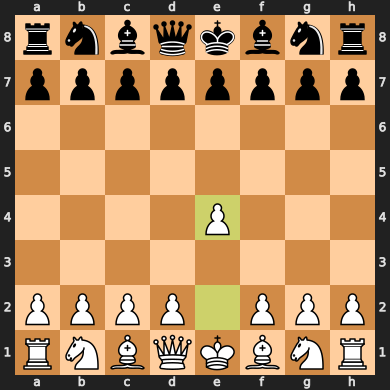

In [9]:
board.push(move)
board

In [10]:
kaufman_test(deepbot)

0.16

In [11]:
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 4/25 = 0.16 | weighted = 0.62
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 10 & 48 & 0.8085 & 0.0000 & b4e7 & 0.0000  \\
02 & f5d4 & 9 & 39 & 0.7895 & 1.0000 & d8f8 & 1.0000  \\
03 & e1d1 & 19 & 38 & 0.5135 & 0.0000 & f2f7 & 0.0000  \\
04 & b1b2 & 38 & 47 & 0.1957 & 0.0000 & e2c3 & 0.0000  \\
05 & g5c1 & 3 & 48 & 0.9574 & 1.0000 & g5d8 & 1.0000  \\
06 & a3a2 & 18 & 31 & 0.4333 & 1.0000 & d7e5 & 1.0000  \\
07 & b7e4 & 25 & 33 & 0.2500 & 1.0000 & f6d5 & 1.0000  \\
08 & h7h6 & 32 & 39 & 0.1842 & 1.0000 & f8c8 & 1.0000  \\
09 & f3e2 & 4 & 35 & 0.9118 & 0.0000 & f3d5 & 0.0000  \\
10 & d5c3 & 15 & 41 & 0.6500 & 1.0000 & d5e7 & 1.0000  \\
11 & g3f5 & 27 & 35 & 0.2353 & 0.0000 & d7d1 & 0.0000  \\
12 & c6d6 & 27 & 41 & 0.3500 & 1.0000 & g6g5 & 1.0000  \\
13 & c3d5 & 1 & 30 & 1.0000 & 0.0000 & c3d5 & 0.0000  \\
14 & b1b2 & 39 & 49 & 0.2083 & 0.0000 & h6c1 & 0.0004  \\
15 & d3f5 & 7 & 51 & 0.8800 & 0.0000 & h6e6 & 0.0000  \\
16 & b3b4 & 2 & 10 & 0.8889 & 0.0000

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,2.414079e-21,b4e7,4.158435e-18,10,48,0.808511
1,f5d4,1.000000e+00,d8f8,1.000000e+00,9,39,0.789474
2,e1d1,3.707817e-31,f2f7,7.042975e-29,19,38,0.513514
3,b1b2,6.046000e-22,e2c3,4.681645e-19,38,47,0.195652
4,g5c1,1.000000e+00,g5d8,1.000000e+00,3,48,0.957447
5,a3a2,1.000000e+00,d7e5,1.000000e+00,18,31,0.433333
6,b7e4,1.000000e+00,f6d5,1.000000e+00,25,33,0.250000
7,h7h6,1.000000e+00,f8c8,1.000000e+00,32,39,0.184211
8,f3e2,5.611238e-19,f3d5,6.478597e-14,4,35,0.911765
9,d5c3,1.000000e+00,d5e7,1.000000e+00,15,41,0.650000


In [12]:
epochs=40
exact_acc = np.zeros(epochs)
weighted_acc = np.zeros(epochs)
train_acc_model = np.zeros(epochs)
test_acc_model = np.zeros(epochs)
for i in range(1,epochs+1):
    deepbot = agent(model,base_name.format(i))
    acc,acc_w,_  = kaufman_test(deepbot,details=1)
    exact_acc[i-1]=acc
    weighted_acc[i-1]=acc_w
    train_acc_model[i-1] = deepbot.history['train']['acc'][-1]
    test_acc_model[i-1] = deepbot.history['test']['acc'][-1]


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GP

In [13]:
path = 'E:/database/stockfish_14.exe'
stockfish = s_agent(path)
ss,ssp,_  = kaufman_test(stockfish,details=1)
print("Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada\n {} | {:.2f}".format(ss,ssp))
ss = np.repeat(ss,epochs)
ssp = np.repeat(ssp,epochs)

Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada
 0.24 | 0.61


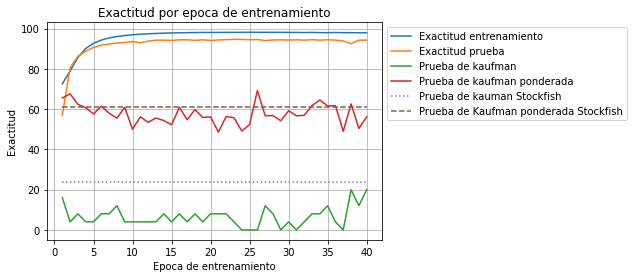

In [14]:
x = np.arange(epochs)+1
plt.plot(x,train_acc_model*100)
plt.plot(x,test_acc_model*100)
plt.plot(x,exact_acc*100)
plt.plot(x,weighted_acc*100)
plt.plot(x,ss*100,linestyle='dotted')
plt.plot(x,ssp*100,linestyle='dashed')
plt.title('Exactitud por epoca de entrenamiento')
plt.xlabel('Epoca de entrenamiento')
plt.ylabel('Exactitud')
plt.legend(['Exactitud entrenamiento','Exactitud prueba','Prueba de kaufman','Prueba de kaufman ponderada','Prueba de kauman Stockfish','Prueba de Kaufman ponderada Stockfish'],bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.savefig('grafica.png',bbox_inches="tight")
plt.show()

In [15]:
train_acc_model

array([0.72540408, 0.7891314 , 0.85649896, 0.90082723, 0.92677748,
       0.94275194, 0.95354843, 0.96017647, 0.9653548 , 0.96903092,
       0.97166079, 0.97384548, 0.97559959, 0.97702503, 0.97808915,
       0.97892362, 0.97954297, 0.9800688 , 0.98062259, 0.98074371,
       0.98077172, 0.98091286, 0.98106235, 0.98120439, 0.98156273,
       0.98121774, 0.98121983, 0.981224  , 0.98110706, 0.98075247,
       0.98076499, 0.98020744, 0.98079842, 0.97973132, 0.9795242 ,
       0.98013103, 0.97942477, 0.97948033, 0.97899419, 0.97889984])

In [16]:
print('Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\\\')
print(' & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\\\')
for i in range(epochs):
    print('{:02d} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'.format(i+1,100*train_acc_model[i],100*test_acc_model[i],100*exact_acc[i],100*weighted_acc[i]))
data = np.stack((train_acc_model,test_acc_model,exact_acc,weighted_acc),axis=1)
pd.DataFrame(data,index=x,columns=["Conjunto de entrenamiento","Conjunto de prueba","Prueba de kaufman","Prueba de kaufman ponderada"])

Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\
 & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\
01 & 72.54 & 56.98 & 16.00 & 65.51 \\
02 & 78.91 & 80.52 & 4.00 & 67.56 \\
03 & 85.65 & 86.25 & 8.00 & 62.38 \\
04 & 90.08 & 88.79 & 4.00 & 60.68 \\
05 & 92.68 & 90.61 & 4.00 & 57.56 \\
06 & 94.28 & 91.72 & 8.00 & 61.42 \\
07 & 95.35 & 92.29 & 8.00 & 57.97 \\
08 & 96.02 & 92.82 & 12.00 & 55.51 \\
09 & 96.54 & 93.05 & 4.00 & 60.83 \\
10 & 96.90 & 93.54 & 4.00 & 49.99 \\
11 & 97.17 & 92.93 & 4.00 & 56.15 \\
12 & 97.38 & 93.75 & 4.00 & 53.44 \\
13 & 97.56 & 94.22 & 4.00 & 55.57 \\
14 & 97.70 & 94.25 & 8.00 & 54.31 \\
15 & 97.81 & 94.12 & 4.00 & 52.22 \\
16 & 97.89 & 94.37 & 8.00 & 60.80 \\
17 & 97.95 & 94.42 & 4.00 & 54.73 \\
18 & 98.01 & 94.13 & 8.00 & 59.75 \\
19 & 98.06 & 94.40 & 4.00 & 55.85 \\
20 & 98.07 & 94.07 & 8.00 & 56.13 \\
21 & 98.08 & 94.33 & 8.00 & 48.51 \\
22 & 98.09 & 94.49 & 8.00 & 56.36 \\
23 & 98.11 & 94.65 & 4.00 & 55.64 \\
24 & 98.12 & 94.62 & 0.00 &

,Conjunto de entrenamiento,Conjunto de prueba,Prueba de kaufman,Prueba de kaufman ponderada
1,0.725404,0.569802,0.16,0.655139
2,0.789131,0.805171,0.04,0.675568
3,0.856499,0.862451,0.08,0.623819
4,0.900827,0.887879,0.04,0.606768
5,0.926777,0.906075,0.04,0.575588
6,0.942752,0.917171,0.08,0.614247
7,0.953548,0.922926,0.08,0.579694
8,0.960176,0.928215,0.12,0.555081
9,0.965355,0.930523,0.04,0.608344
10,0.969031,0.935383,0.04,0.499930
